# Sales Analysis

## Preparing data

### Import Necessary Libraries

In [1]:
import pandas as pd

### Import All Sales Data

In [3]:
df1 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_January_2019.csv")
df2 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_February_2019.csv")
df3 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_March_2019.csv")
df4 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_April_2019.csv")
df5 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_May_2019.csv")
df6 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_June_2019.csv")
df7 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_July_2019.csv")
df8 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_August_2019.csv")
df9 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_September_2019.csv")
df10 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_October_2019.csv")
df11 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_November_2019.csv")
df12 = pd.read_csv("D:\Data Analysis\Sales Data Pandas Project\Sales_December_2019.csv")


### Merging all dataframes into a single one

In [5]:
df = pd.concat([df1, df2, df3, df4, df5, df5, df6, df7, df8, df9, df10, df11, df12])

## Cleaning Data

### Dropping rows with missing data

In [7]:
df = df.dropna(how="all")

### Deleting duplicate data

In [9]:
df = df.drop_duplicates()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [11]:
df = df[df["Order ID"] != "Order ID"]

### Converting columns to appropriate data types

In [13]:
df["Product"] = df["Product"].astype(str)
df["Purchase Address"] = df["Purchase Address"].astype(str)
df["Order ID"] = df["Order ID"].astype(int)
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)
df["Order Date"] = pd.to_datetime(df["Order Date"], format="mixed")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


## Question 1: What was the best month for sales? How much was earned that month?

### Adding a "Month" column

In [15]:
df["Month"] = df["Order Date"].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


### Adding a "Sales column"

In [17]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99


### Best month for sales

In [19]:
results1 = df.groupby("Month").sum("Sales")   #December - $4608295.70
results1

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1420152202,10893,1810924.81,1821413.16
2,1868278508,13431,2186940.38,2200078.08
3,2560592045,16979,2789084.64,2804973.35
4,3383299164,20536,3366218.76,3389217.98
5,3343056791,18653,3133134.61,3150616.23
6,2928868159,15234,2560503.50,2576280.15
7,3280010744,16054,2631225.12,2646461.32
8,2894980432,13429,2226963.90,2241083.37
9,2944144303,13091,2081897.65,2094465.69


In [21]:
import matplotlib.pyplot as plt

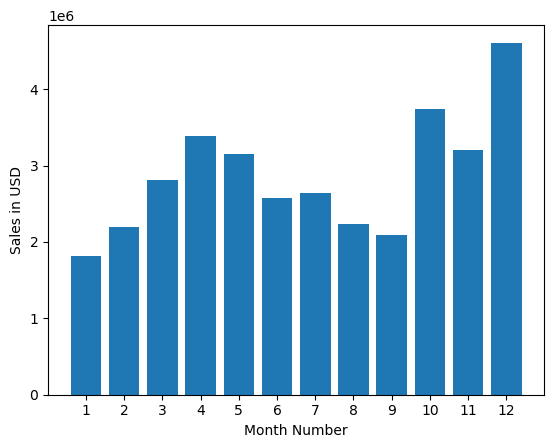

In [23]:
months = range(1,13)
plt.bar(months, results1["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month Number")
plt.show()

## Question 2: What city had the highest number of sales?

### Creating "Street", "City", "Zip" columns

In [25]:
df[["Street", "City", "Zip"]] = df['Purchase Address'].str.split(', ',expand=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,387 10th St,Austin,TX 73301


### City with highest number of sales

In [27]:
results2 = df.groupby("City").sum("Sales")   #San Francisco - $8254743.55
results2

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta,3419484721,16584,2778608.69,104649,2794199.07
Austin,2277506240,11137,1808340.03,69720,1818044.33
Boston,4590961337,22494,3634398.40,140898,3658627.65
Dallas,3410206282,16707,2750026.38,104447,2765373.96
Los Angeles,6801454376,33247,5417171.70,208020,5448304.28
New York City,5729940452,27903,4632920.54,175557,4661867.14
Portland,2864927251,14037,2306588.80,87636,2319331.94
San Francisco,10287205330,50169,8204001.38,314949,8254743.55
Seattle,3402480817,16534,2730586.55,104817,2745046.02


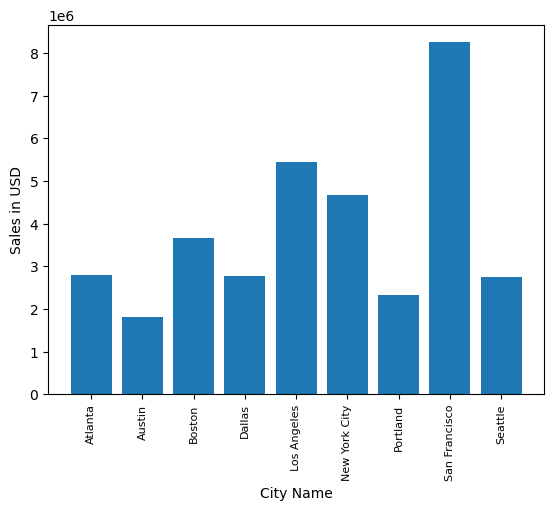

In [29]:
city = [city for city, df13 in df.groupby("City")]
plt.bar(city, results2["Sales"])
plt.xticks(city, rotation="vertical", size=8)
plt.ylabel("Sales in USD")
plt.xlabel("City Name")
plt.show()

## Question 3: What time should advertisements be displayed to maximize likelihood of customers buying products?

In [31]:
df["Order Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip,Order Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,944 Walnut St,Boston,MA 02215,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,185 Maple St,Portland,OR 97035,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,538 Adams St,San Francisco,CA 94016,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,738 10th St,Los Angeles,CA 90001,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,387 10th St,Austin,TX 73301,11


### Times advertisements should be displayed

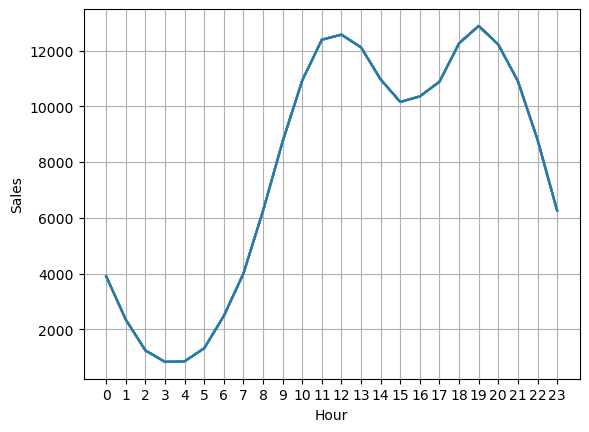

In [33]:
hour = [hour for hour, df14 in df.groupby("Order Hour")]
plt.plot(hour, df.groupby(["Order Hour"]).count())
plt.xticks(hour)
plt.ylabel("Sales")
plt.grid()
plt.xlabel("Hour")
plt.show()
# My recommendations are arround 11 am and 7 pm.

## Question 4: What products are most often sold together?

In [35]:
df15 = df[df["Order ID"].duplicated(keep=False)]
df15["Grouped"] = df15.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df15.head()

C:\Users\alexp\AppData\Local\Temp\ipykernel_6532\1707264870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15["Grouped"] = df15.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip,Order Hour,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,610 Walnut St,Austin,TX 73301,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,610 Walnut St,Austin,TX 73301,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,4 1st St,Los Angeles,CA 90001,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,4 1st St,Los Angeles,CA 90001,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,20 Dogwood St,New York City,NY 10001,11,"Vareebadd Phone,Wired Headphones"


In [37]:
df15 = df15[["Order ID", "Grouped"]].drop_duplicates()
df15.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


### Products often sold togheter

In [39]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df15["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
count.most_common(10)
# 'iPhone', 'Lightning Charging Cable

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Question 5: What product sold the most?

In [41]:
results3 = df.groupby("Product").sum("Quantity Ordered").sort_values(['Quantity Ordered'], ascending=[False])   # AAA Batteries (4-pack) sold the most
results3

,Order ID,Quantity Ordered,Price Each,Month,Sales,Order Hour
Product,,,,,,
AAA Batteries (4-pack),4758103011,30986,61629.88,146149,92648.14,296904
AA Batteries (4-pack),4739758630,27615,78942.72,145423,106041.60,298077
USB-C Charging Cable,5039593237,23931,261215.05,154520,285975.45,313980
Lightning Charging Cable,4982889323,23169,323069.50,152741,346376.55,311815
Wired Headphones,4342771235,20524,225999.51,133123,246082.76,271245
Apple Airpods Headphones,3573531925,15637,2328750.00,109304,2345550.00,222938
Bose SoundSport Headphones,3065241918,13430,1329667.02,93918,1342865.70,192077
27in FHD Monitor,1722024291,7541,1124625.02,52484,1131074.59,107422
iPhone,1571023865,6847,4788000.00,47933,4792900.00,98617


In [45]:
results4 = df.groupby("Product").sum("Quantity Ordered")

### Products sold the most

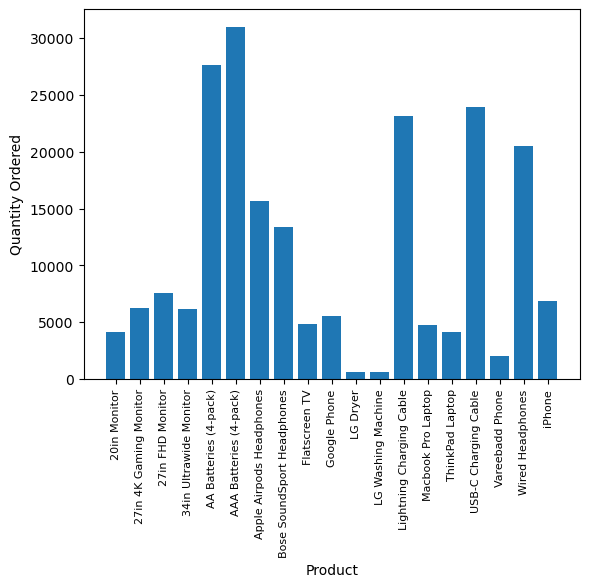

In [47]:
product = [product for product, results5 in df.groupby("Product")]         # AAA Batteries (4-pack) sold the most
plt.bar(product, results4["Quantity Ordered"])
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(product, rotation="vertical", size=8)
plt.show()